# Clustering kMeans Test Cases
This notebook is an extension of the pytest file used in TDD. It shows the results of the following function(s) in the library
- get_kMeans

In [ ]:
import numpy as np
import pylab as plt
import pandas as pd
from scipy.spatial.distance import cdist, pdist

## Functions

In [13]:
def get_kMeans(df, k, verbose=0):
    """
    Computes kMeans for an arbitrary (n,d) data set.
    Parameters:
    df: data frame (n,d) dimension
        n points in a R^d space
    k:  scalar
        k clusters
    verbose: integer
        verbose options:
        - 0: no extra information
        - 1: additional details about iterations
    Returns:
    df: data frame (n,d+1) dimension
        same input data frame with an additional column called 'label' with
        the cluster index
    """

    # initializing a random set of k centroids
    n, d = df.shape
    centroid0 = np.random.uniform(df.min().min(),df.max().max(),size=(k,d))
    lCentroids = [centroid0]

    # defining a working version of the input df.
    # computing the closest centroid index
    df_km = df.copy()
    df_km['closest_centroid'] = np.argmin(cdist(df, centroid0),axis=1)

    # repeat until there is no further change
    delta_centroids = 1
    iteration = 1
    while delta_centroids > 0:
        current_centroids = df_km['closest_centroid']
        # update centroid with mean value of input data per cluster
        centroid = np.array(df_km.groupby('closest_centroid').mean().reset_index()[np.arange(d)])
        lCentroids.append(centroid)
        df_km['closest_centroid'] = np.argmin(cdist(df, lCentroids[-1]),axis=1)
        delta_centroids = np.abs(df_km['closest_centroid'] - current_centroids).sum()

        if verbose == 1:
            print('Iteration Number ' + str(iteration))
            print(df_km['closest_centroid'].value_counts())

        iteration = iteration + 1

    df['label'] = df_km['closest_centroid']
    return(df,lCentroids)

## kMeans Test
In this section we will test the perfomance of our kMeans implementation with two examples: 3 bivariate gaussian clusters one with large inter-cluster distance and the other with small inter-cluster distance

### Test 1 - large inter-cluster distance

In [57]:
# Create 3 clusters in a 2D space - large inter-cluster distance
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
NN = 500
x1, y1 = np.random.multivariate_normal(mean1, cov1, NN).T
mean2 = [10, 0]
cov2 = [[1, 0], [0, 1]]
NN = 500
x2, y2 = np.random.multivariate_normal(mean2, cov2, NN).T
mean3 = [0, 10]
cov3 = [[1, 0], [0, 1]]
NN = 500
x3, y3 = np.random.multivariate_normal(mean3, cov3, NN).T

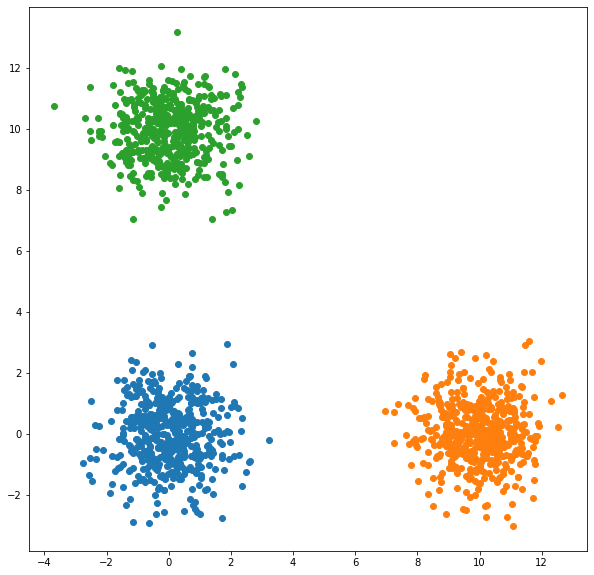

In [58]:
# visualize the clusters
plt.figure(figsize=(10,10))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

In [62]:
# create data frame with data
df1 = pd.DataFrame(np.transpose([x1,y1]))
df2 = pd.DataFrame(np.transpose([x2,y2]))
df3 = pd.DataFrame(np.transpose([x3,y3]))
df = pd.concat([df1,df2,df3])

In [63]:
# run function - output: new data frame with original data + clustering labels; list of centroids
k =3
df_clustering, lCentroids = get_kMeans(df, k=k, verbose=0)

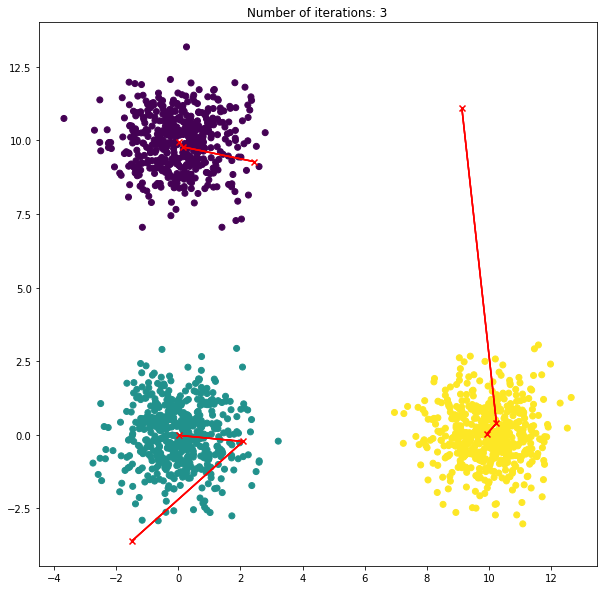

In [65]:
# visualize clusters and centroid trajectory
plt.figure(figsize=(10,10))
plt.scatter(df_clustering[0],df_clustering[1],c=df_clustering['label'])
for item in lCentroids:
    plt.scatter(*zip(*item),marker='x',c='red')
    for i_cluster in range(k):
        plt.plot(*zip(*[item[i_cluster] for item in lCentroids]),color='red')
plt.title('Number of iterations: ' + str(len(lCentroids)))
plt.savefig('kMeans_example_large_inter.png')
plt.show()

### Test 2: small inter-cluster distance

In [66]:
# Create 3 clusters in a 2D space - large inter-cluster distance
mean1 = [0, 0]
cov1 = [[5, 0], [0, 5]]
NN = 500
x1, y1 = np.random.multivariate_normal(mean1, cov1, NN).T
mean2 = [10, 0]
cov2 = [[5, 0], [0, 5]]
NN = 500
x2, y2 = np.random.multivariate_normal(mean2, cov2, NN).T
mean3 = [0, 10]
cov3 = [[5, 0], [0, 5]]
NN = 500
x3, y3 = np.random.multivariate_normal(mean3, cov3, NN).T

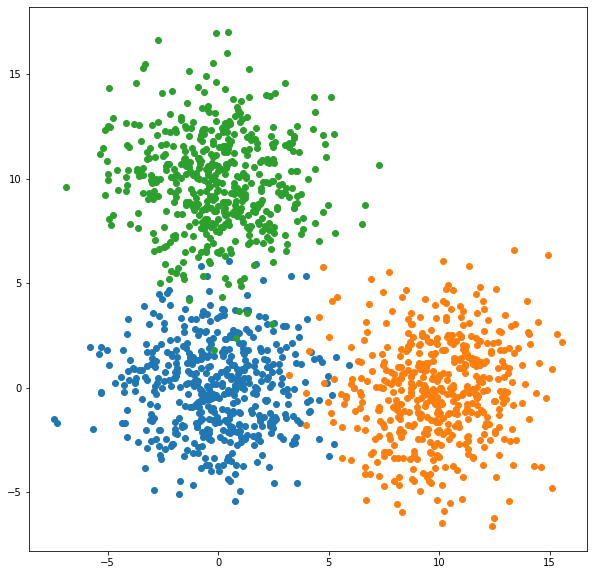

In [67]:
# visualize the clusters
plt.figure(figsize=(10,10))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

In [68]:
# create data frame with data
df1 = pd.DataFrame(np.transpose([x1,y1]))
df2 = pd.DataFrame(np.transpose([x2,y2]))
df3 = pd.DataFrame(np.transpose([x3,y3]))
df = pd.concat([df1,df2,df3])

In [69]:
# run function - output: new data frame with original data + clustering labels; list of centroids
k =3
df_clustering, lCentroids = get_kMeans(df, k=k, verbose=0)

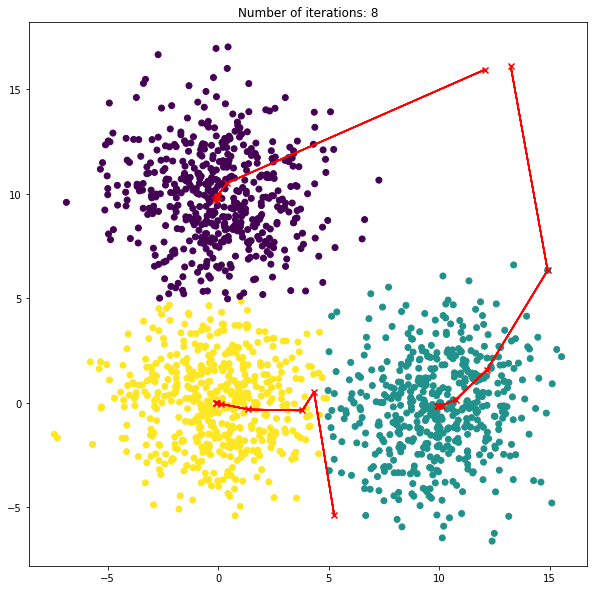

In [70]:
# visualize clusters and centroid trajectory
plt.figure(figsize=(10,10))
plt.scatter(df_clustering[0],df_clustering[1],c=df_clustering['label'])
for item in lCentroids:
    plt.scatter(*zip(*item),marker='x',c='red')
    for i_cluster in range(k):
        plt.plot(*zip(*[item[i_cluster] for item in lCentroids]),color='red')
plt.title('Number of iterations: ' + str(len(lCentroids)))
plt.savefig('kMeans_example_small_inter.png')
plt.show()